In [1]:
from PIL import Image
import numpy as np

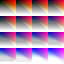

In [2]:
lut = Image.open("/Users/vzhavoronkov/Developer/mediapipe/mediapipe/examples/ios/sandbox/white.teeth.src.png")

lut

In [3]:
reshaped = np.asarray(lut)

In [7]:
def hald(pixels, width, height, cube_width, cube_height):
    pixelsInRow = width // cube_width
    rowsInBlock = height // cube_height
    blocksInROW = cube_width
    blocksCount = cube_width * cube_height
    rowsInROW = blocksInROW * rowsInBlock
    
    output = [0 for i in range(width * height)]
    for rowIndex in range(rowsInBlock * blocksCount):
        baseRow = rowIndex * pixelsInRow
        row = pixels[baseRow:(baseRow + pixelsInRow)]
        (x, y) = (rowIndex % blocksInROW, rowIndex // rowsInROW)
        yInBlock = (rowIndex - y * rowsInROW) // blocksInROW
        baseTransformed = (y * rowsInROW + x * pixelsInRow + yInBlock) * pixelsInRow
        output[baseTransformed:(baseTransformed + pixelsInRow)] = row            
        
    return output
        
transformed = np.asarray(hald(reshaped.reshape((4096, 3)), lut.width, lut.height, 4, 4))

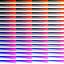

In [8]:
img = Image.fromarray(transformed.reshape((lut.width, lut.height, 3)))
img.save("/tmp/img1.png","PNG")
img

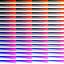

In [9]:
img1 = Image.open("/Users/vzhavoronkov/Developer/mediapipe/mediapipe/examples/ios/sandbox/whiteTeeth.png")
img1

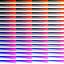

In [10]:
img2 = Image.open("/tmp/img1.png")
img2

In [11]:
np.equal(np.asarray(img1), np.asarray(img2))

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,